# Завдання 1
Імпортувати датасет `data.csv` у об'єкт `DataFrame` і провести попередній аналіз даних засобами `pandas`, `matplotlib`, `seaborn`.  

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelBinarizer
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV

In [4]:
df = pd.read_csv('data.csv')

In [5]:
df.head(20)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,sem,GRADE
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,4,3,4,1,1,3,4,-2.302585,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,no,5,3,3,1,1,3,2,2.208274,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,no,4,3,2,2,3,3,6,2.493205,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,3,2,2,1,1,5,0,2.646175,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,4,3,2,1,2,5,0,2.406945,13
5,GP,M,16,U,LE3,T,4,3,services,other,...,no,5,4,2,1,2,5,6,2.493205,13
6,GP,M,16,U,LE3,T,2,2,other,other,...,no,4,4,4,1,1,3,0,2.493205,13
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,no,4,1,4,1,1,1,2,2.312535,13
8,GP,M,15,U,LE3,A,3,2,services,other,...,no,4,2,2,1,1,1,0,2.714695,17
9,GP,M,15,U,GT3,T,3,4,other,other,...,no,5,5,1,1,1,5,0,2.493205,13


In [6]:
df = df.dropna()

In [7]:
#розмірність
df.shape

(944, 32)

In [8]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'sem', 'GRADE'],
      dtype='object')

In [9]:
#Інформація про датасет:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944 entries, 0 to 943
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      944 non-null    object 
 1   sex         944 non-null    object 
 2   age         944 non-null    int64  
 3   address     944 non-null    object 
 4   famsize     944 non-null    object 
 5   Pstatus     944 non-null    object 
 6   Medu        944 non-null    int64  
 7   Fedu        944 non-null    int64  
 8   Mjob        944 non-null    object 
 9   Fjob        944 non-null    object 
 10  reason      944 non-null    object 
 11  guardian    944 non-null    object 
 12  traveltime  944 non-null    int64  
 13  studytime   944 non-null    int64  
 14  failures    944 non-null    int64  
 15  schoolsup   944 non-null    object 
 16  famsup      944 non-null    object 
 17  paid        944 non-null    object 
 18  activities  944 non-null    object 
 19  nursery     944 non-null    o

In [10]:
#Статистика даних
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,sem,GRADE
count,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000
mean,16.688559,2.636653,2.404661,1.507415,1.985169,0.253178,3.940678,3.192797,3.145127,1.475636,2.282839,3.527542,4.385593,2.284653,11.469280
std,1.204638,1.129181,1.098258,0.723744,0.832653,0.645147,0.907538,1.028188,1.137949,0.877091,1.268545,1.434791,6.331564,0.679939,3.794162
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,-2.302585,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,2.208274,10.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,2.406945,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,2.572612,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,2.949688,20.000000


##  Матриця кореляції Пірсона

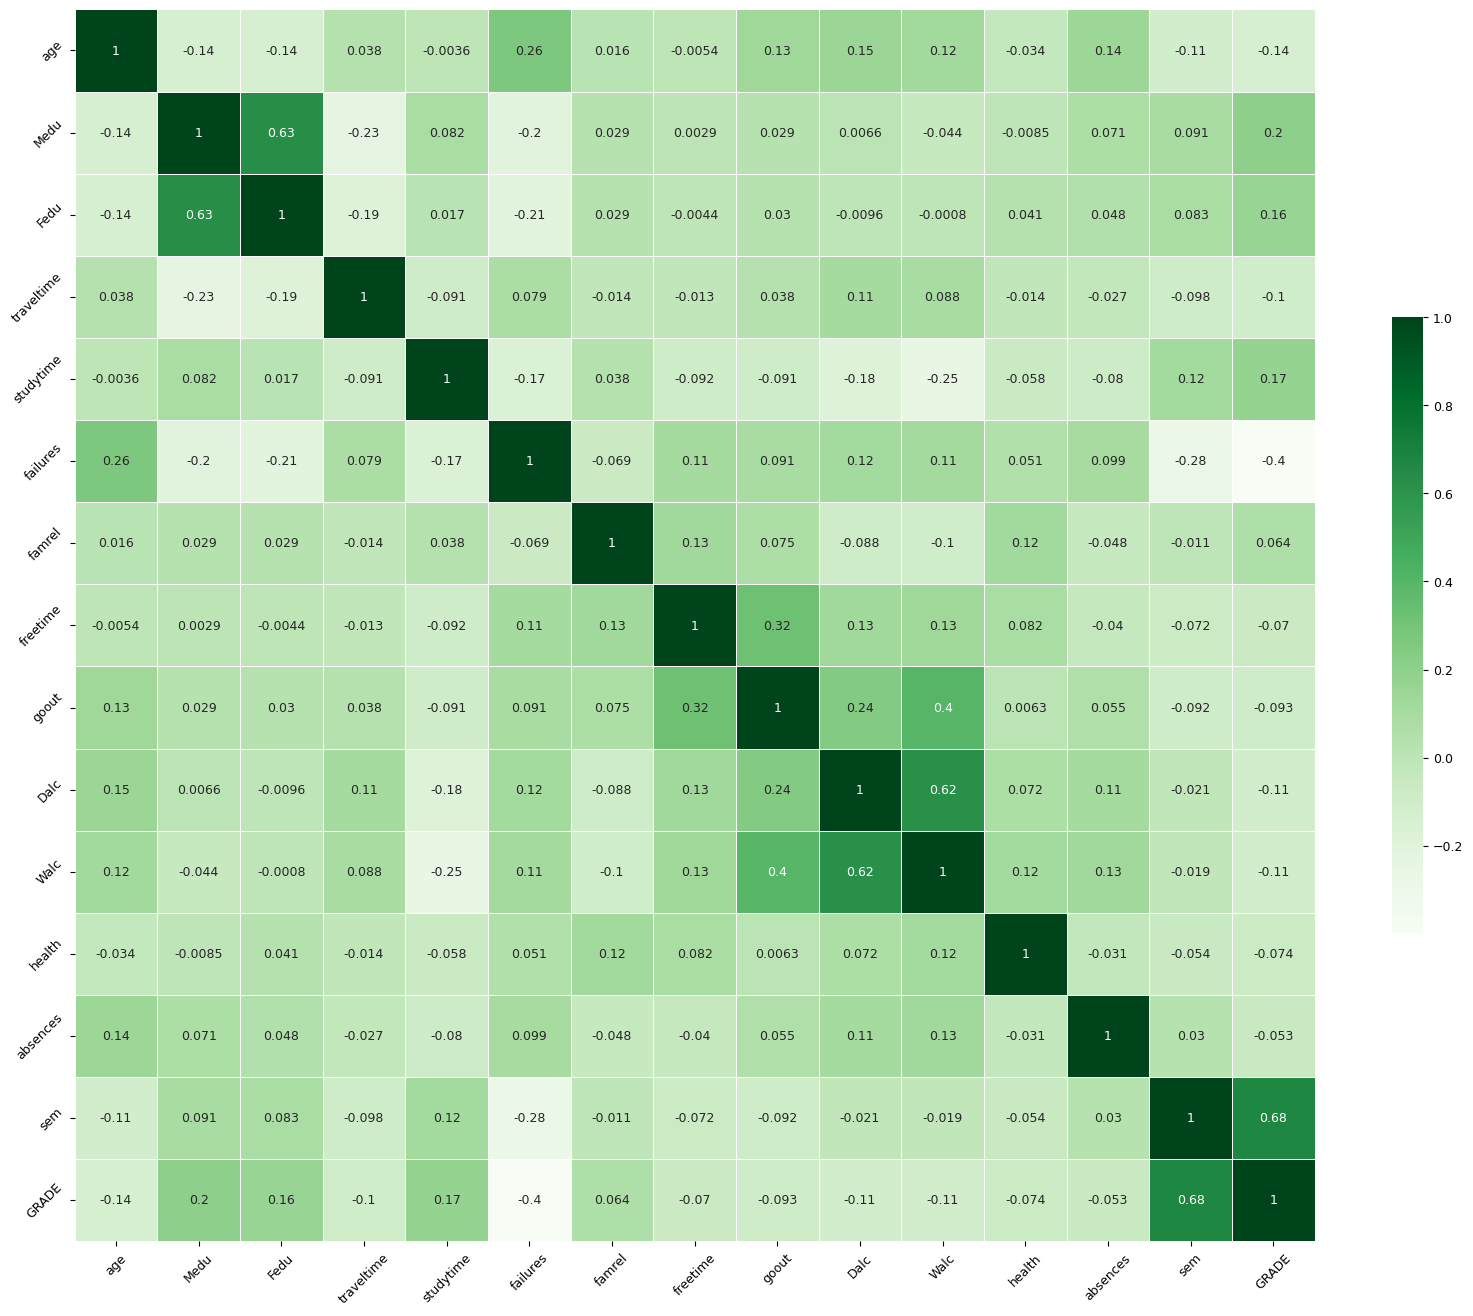

In [11]:
numerical_columns = list(df.select_dtypes(include=['int64', 'float64']))
corr = df[numerical_columns].corr()
plt.rc('font', size=9)
plt.figure(figsize=(20, 16))
sns.heatmap(corr, annot=True, linewidths=0.5, cbar_kws={'shrink': 0.5}, cmap = 'Greens')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [12]:
#pd.plotting.scatter_matrix(df,alpha=0.6, figsize=(15, 15), diagonal='kde');

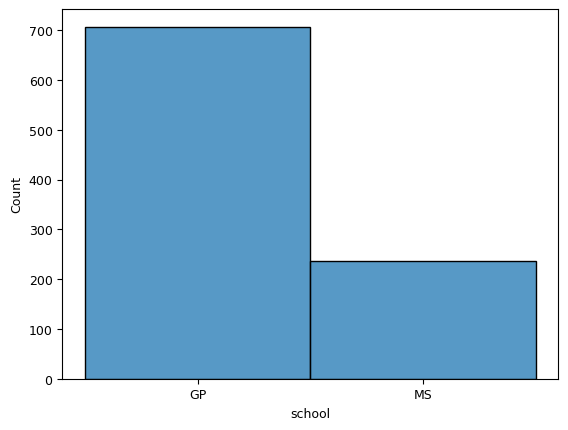

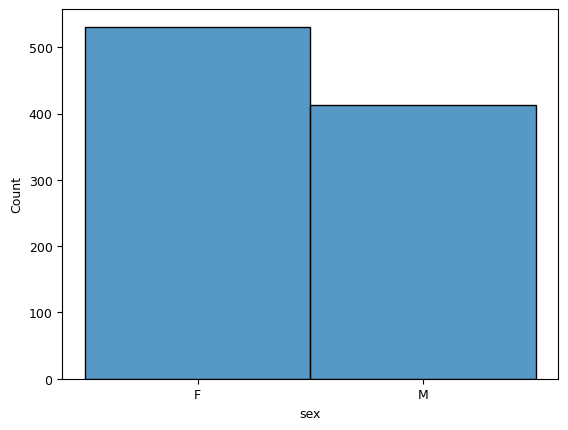

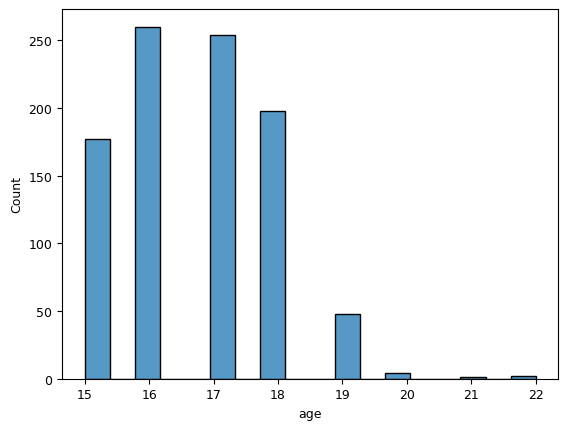

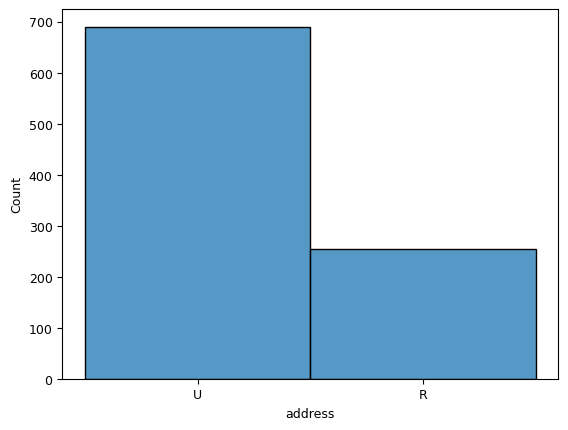

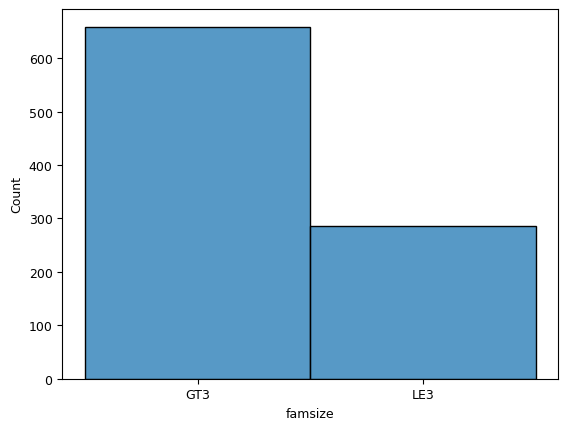

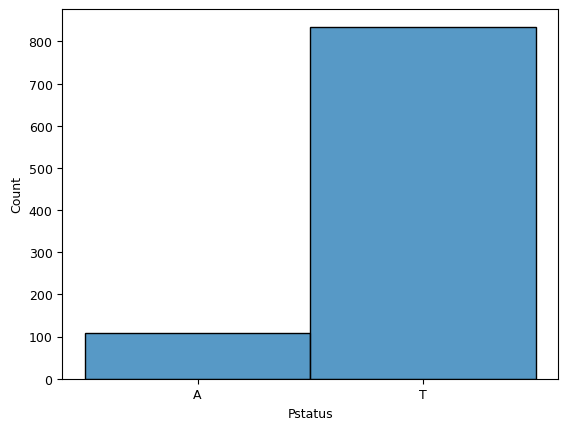

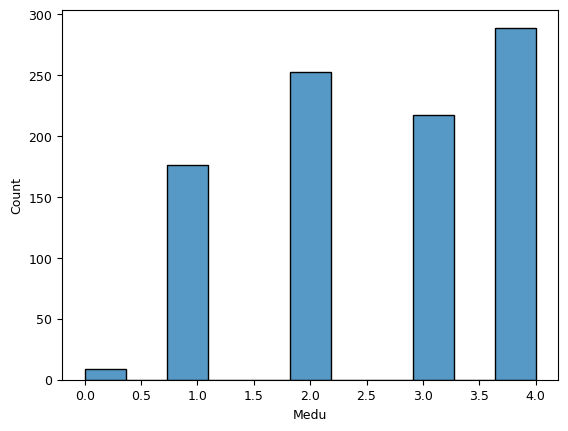

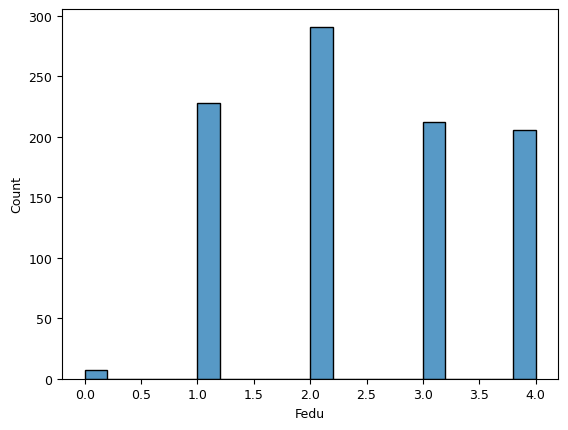

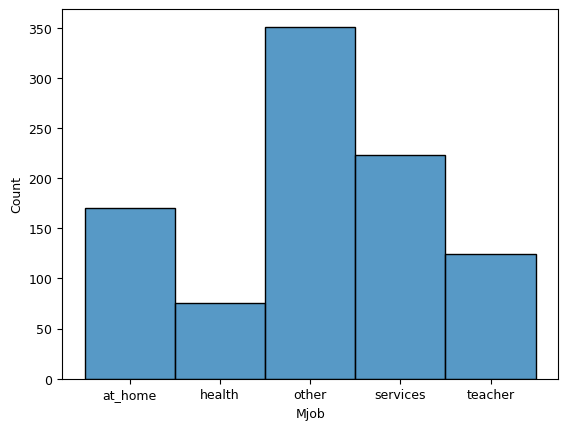

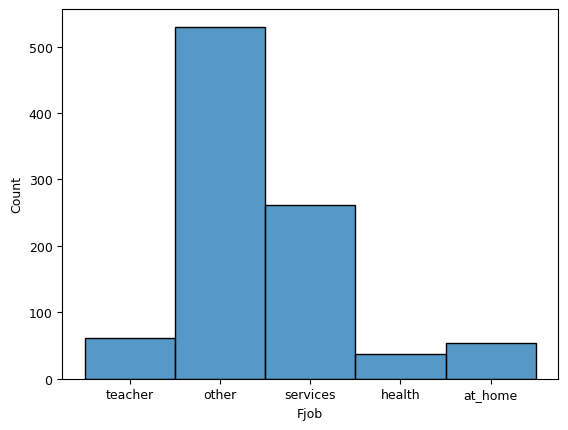

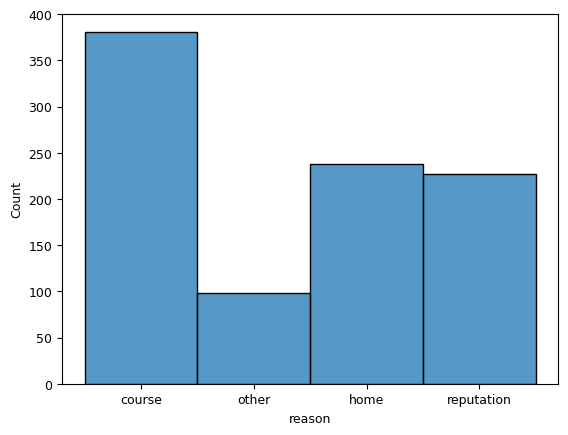

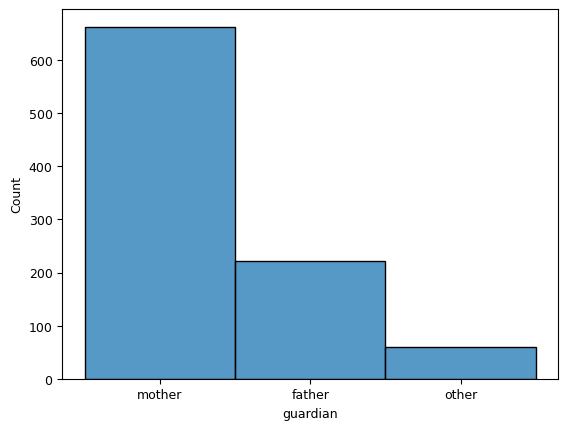

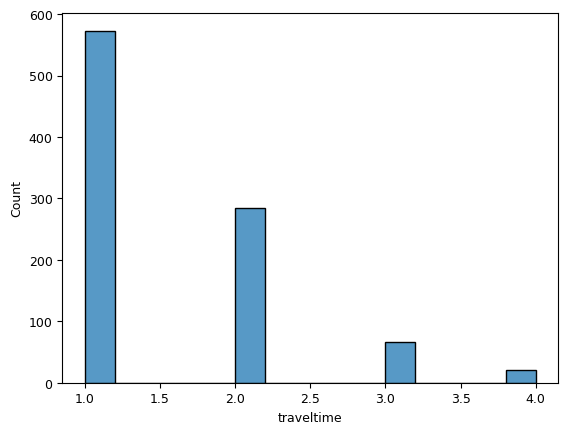

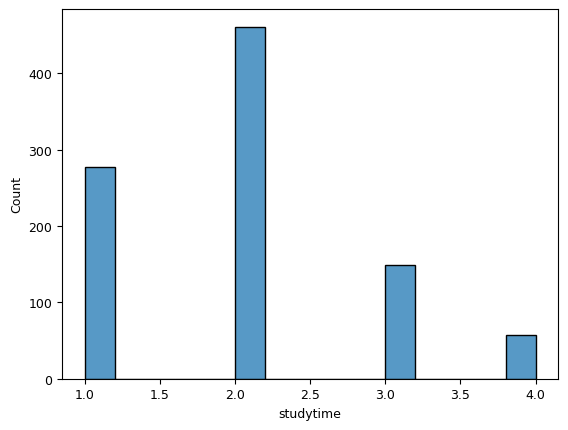

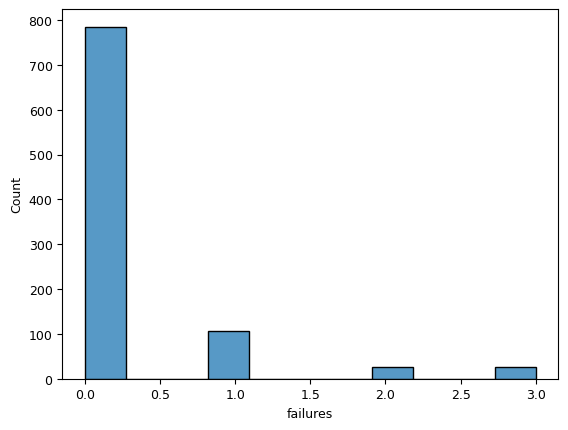

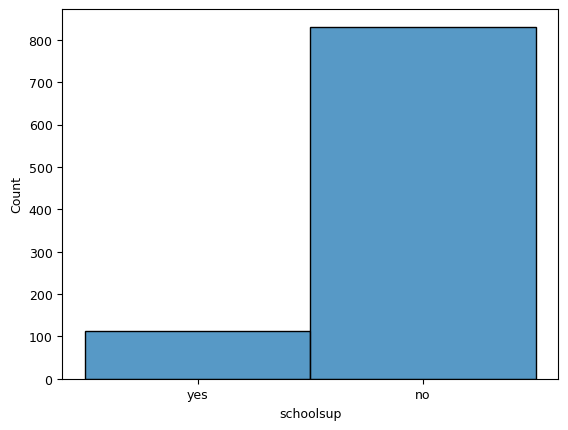

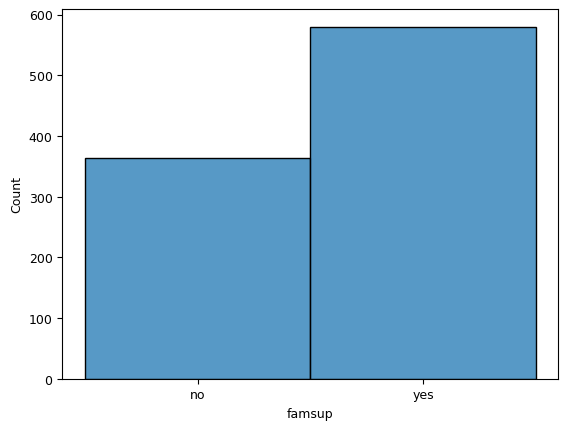

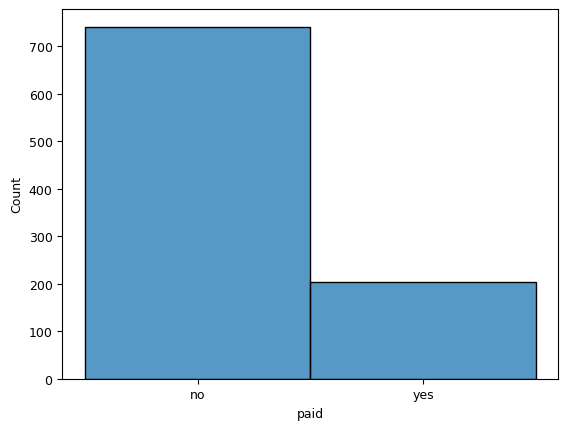

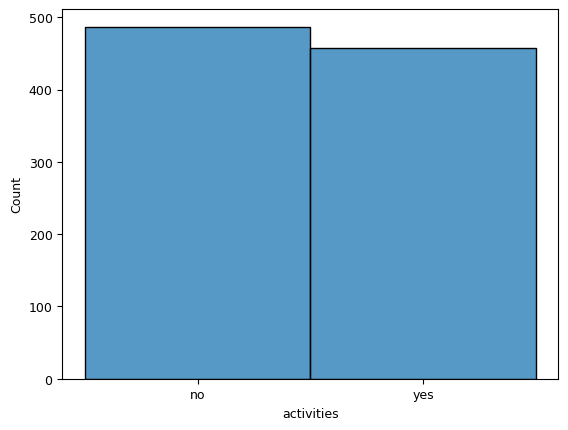

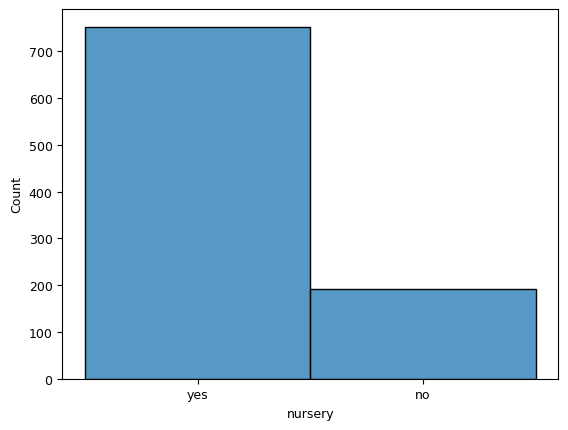

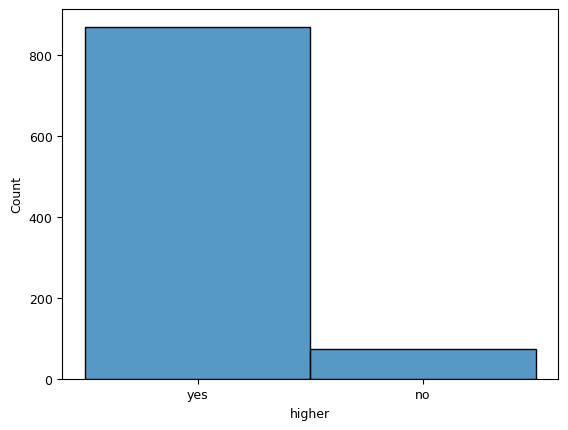

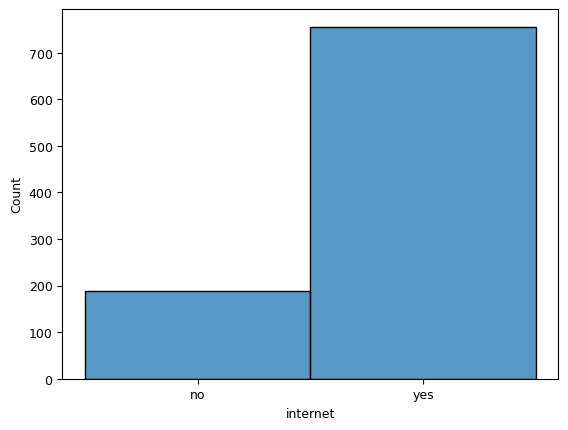

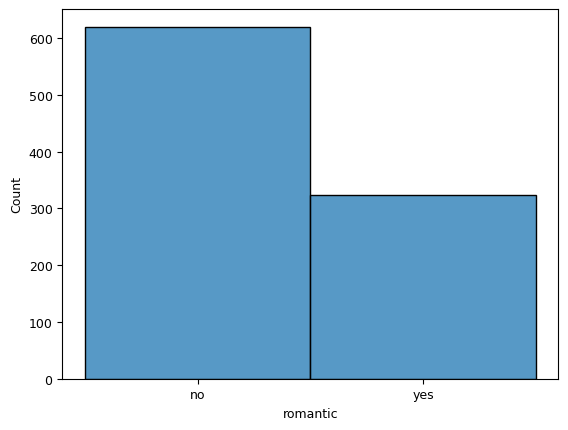

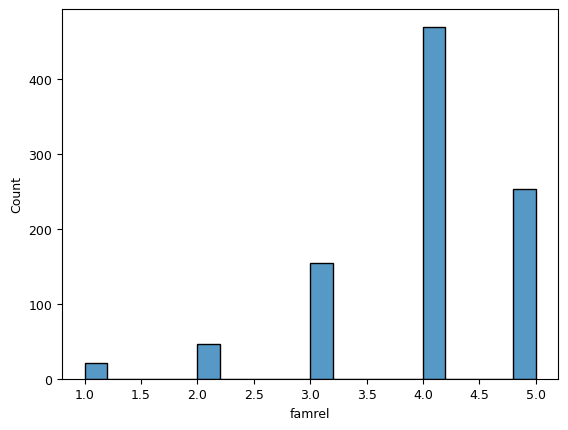

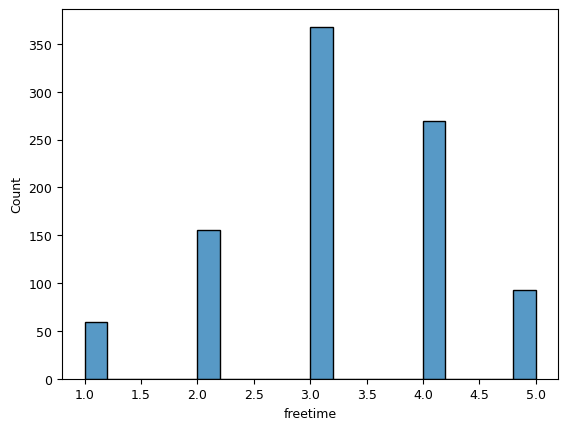

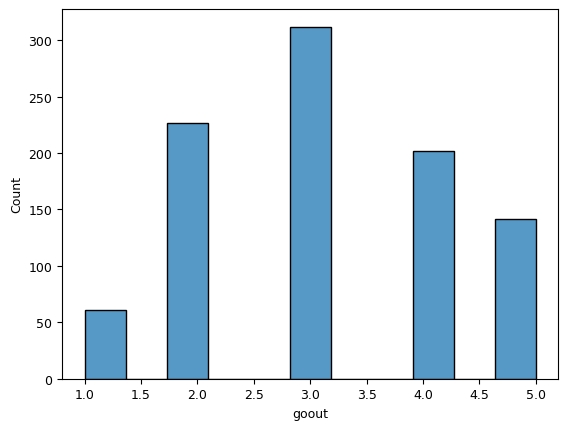

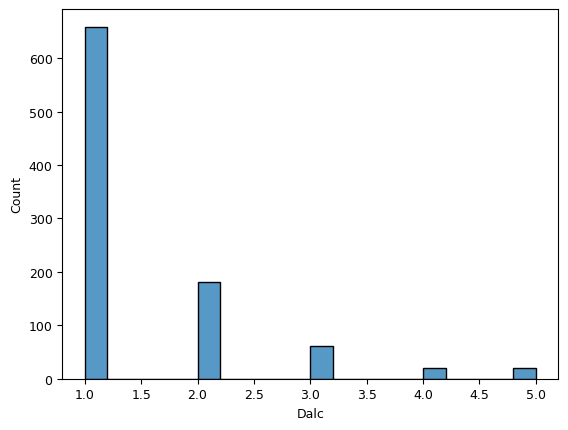

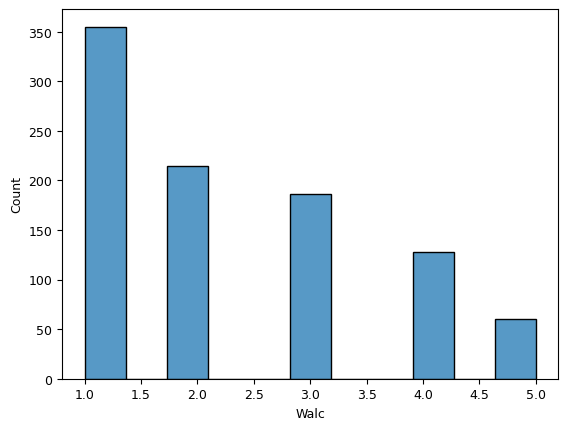

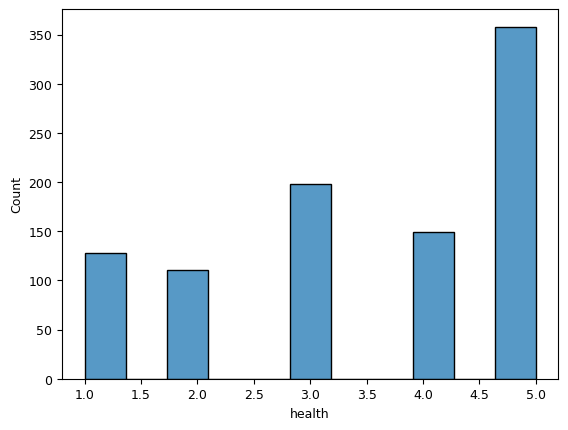

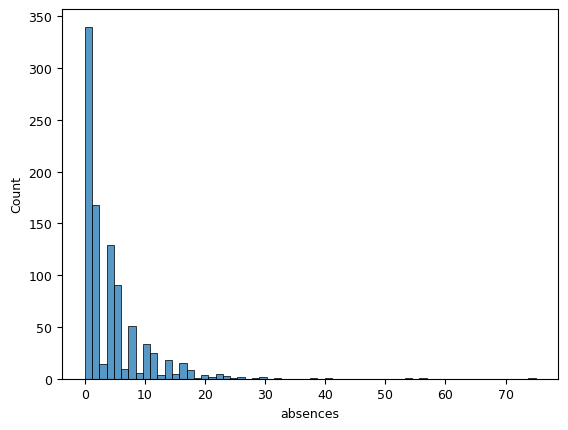

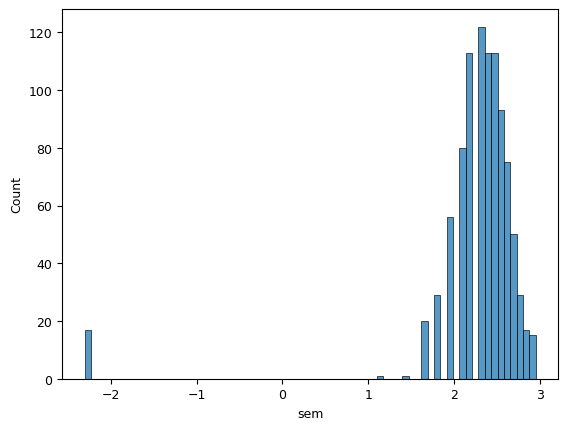

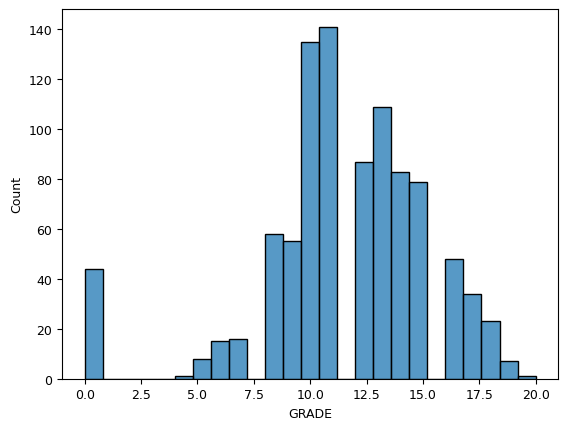

In [13]:
for col in df.columns:
    sns.histplot(data=df, x=col)
    plt.show()

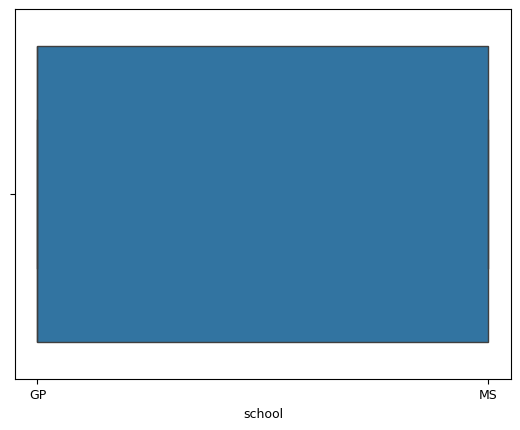

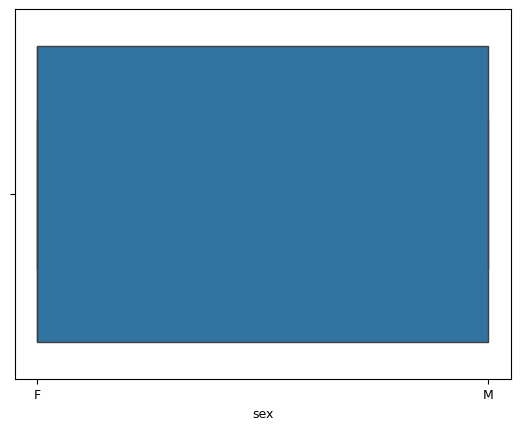

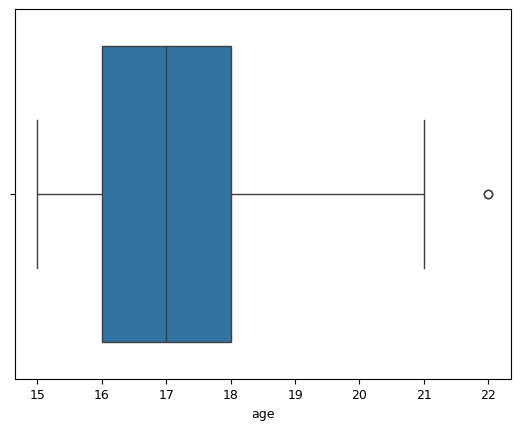

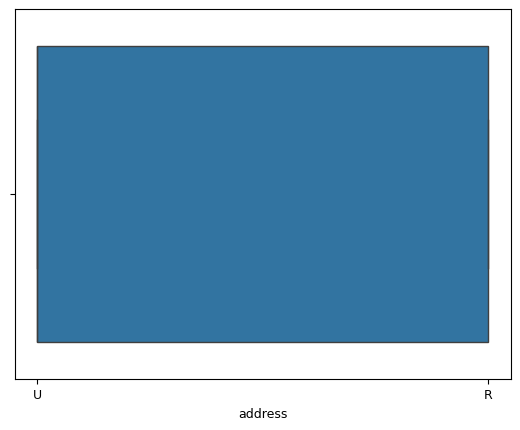

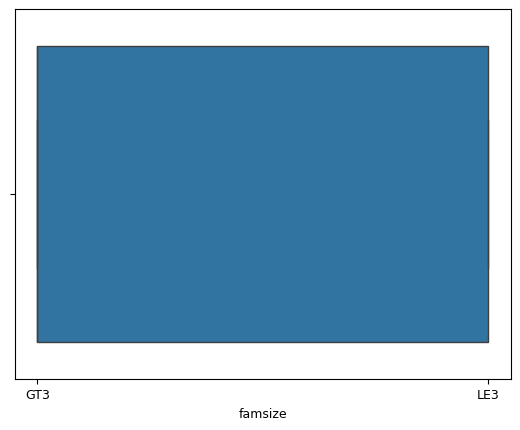

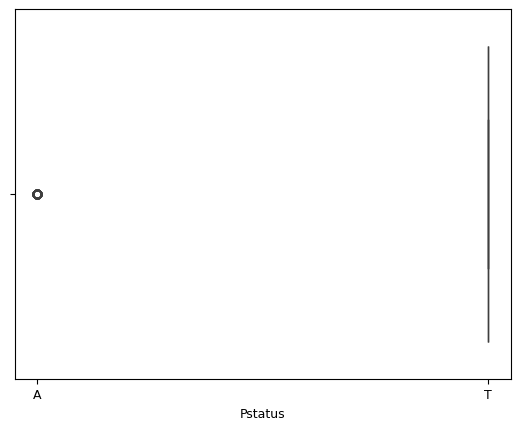

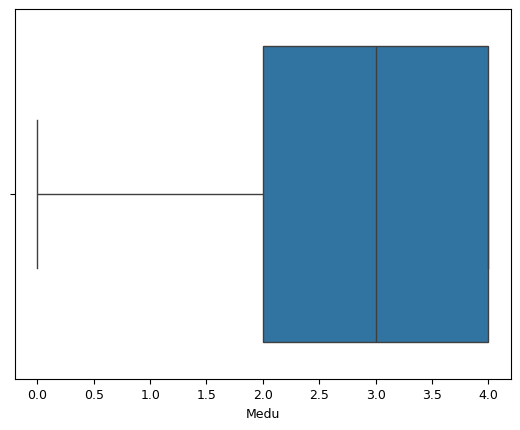

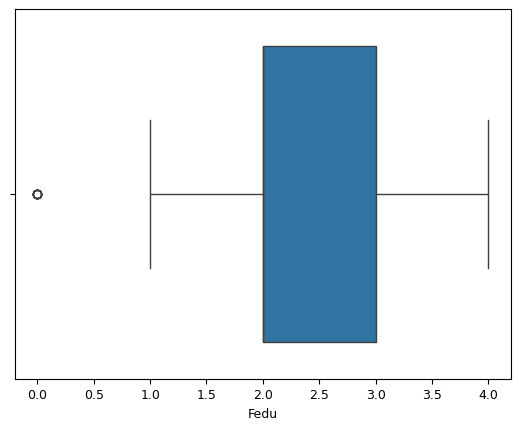

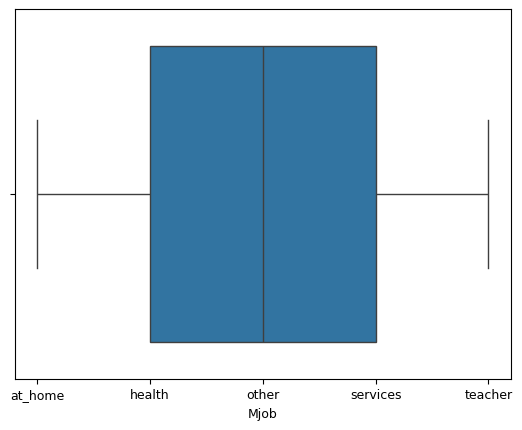

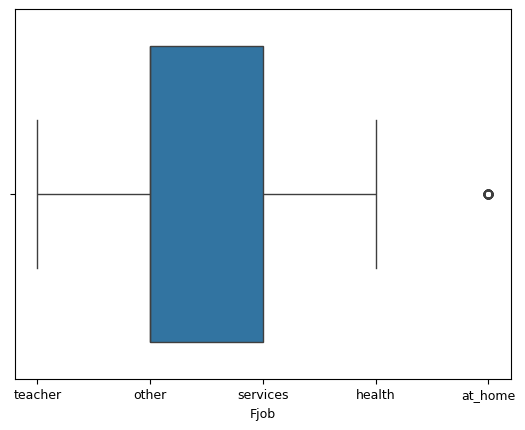

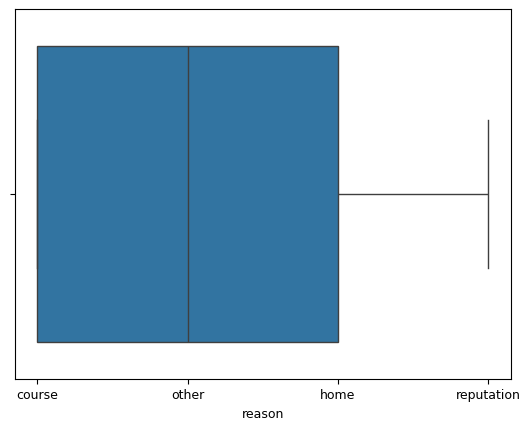

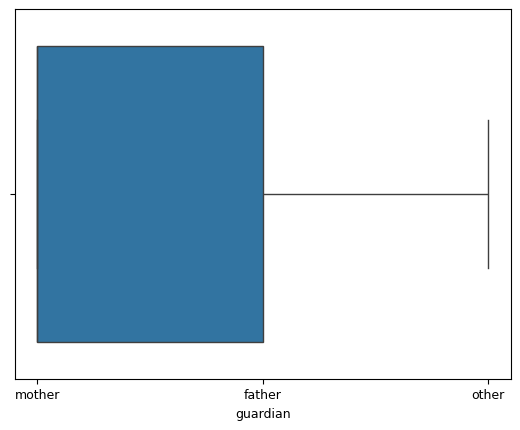

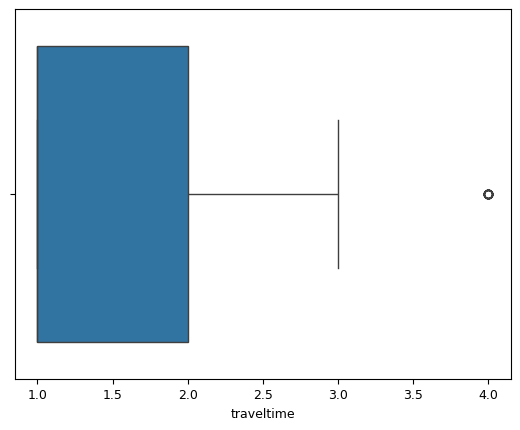

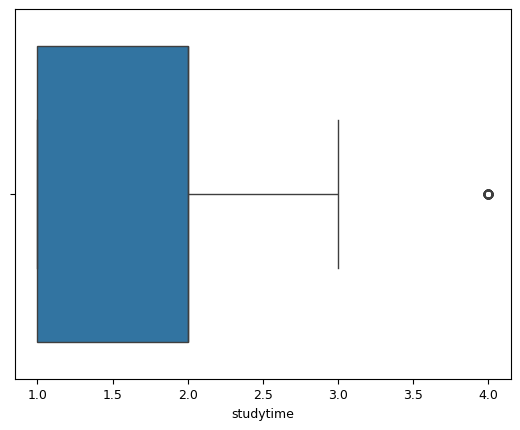

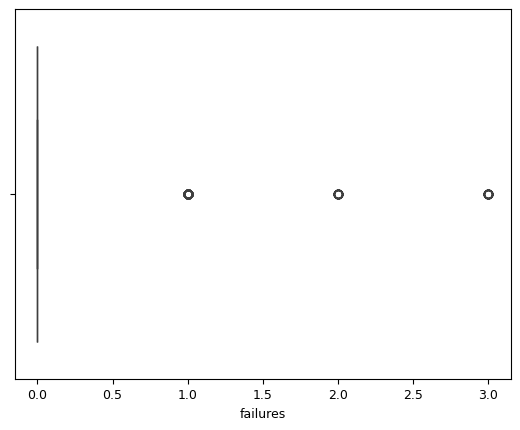

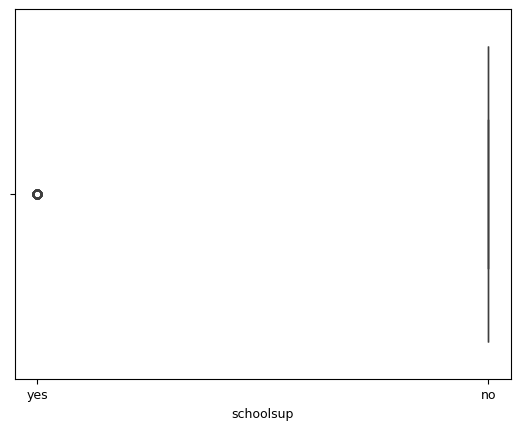

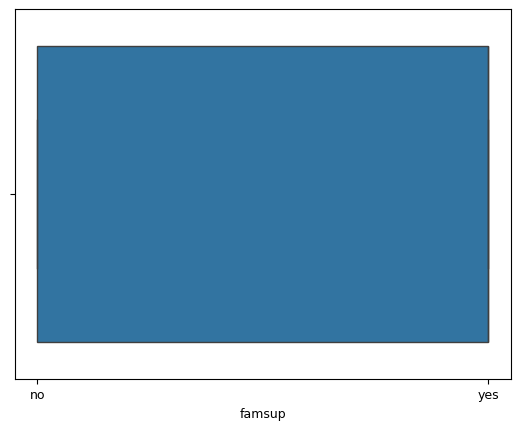

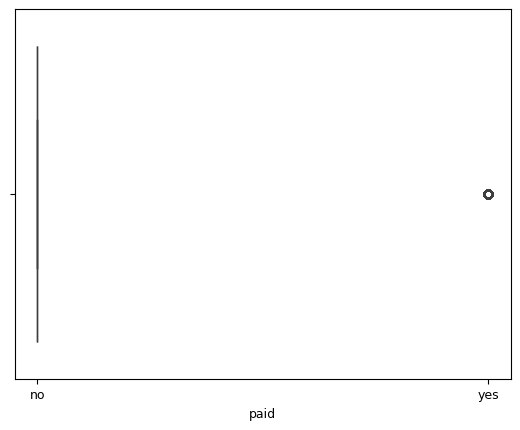

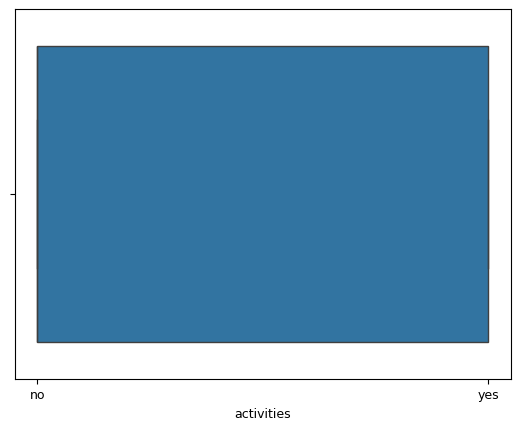

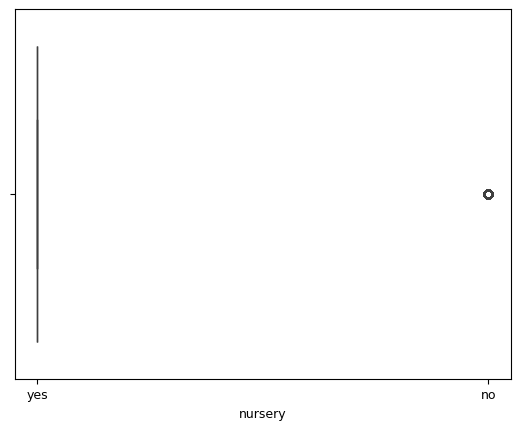

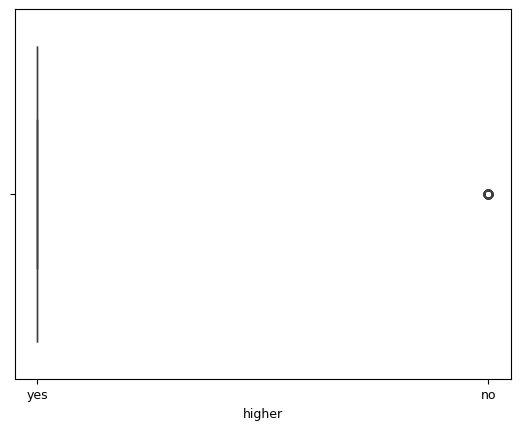

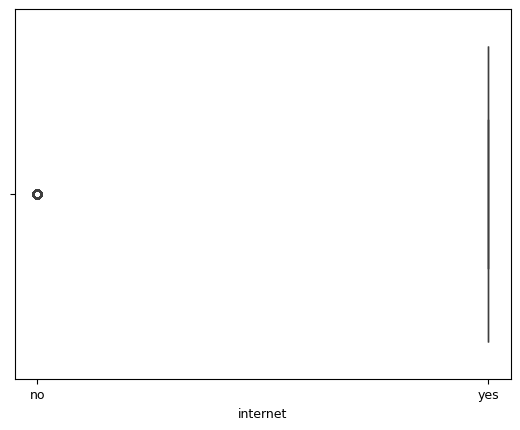

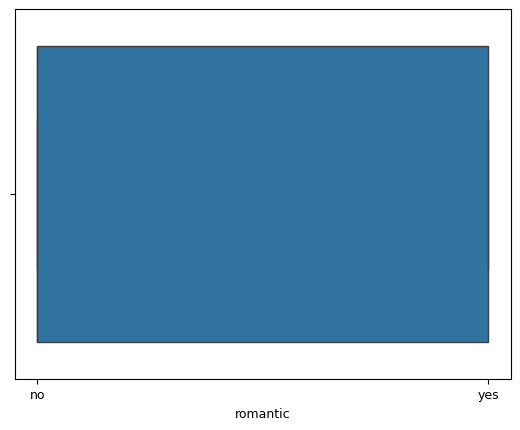

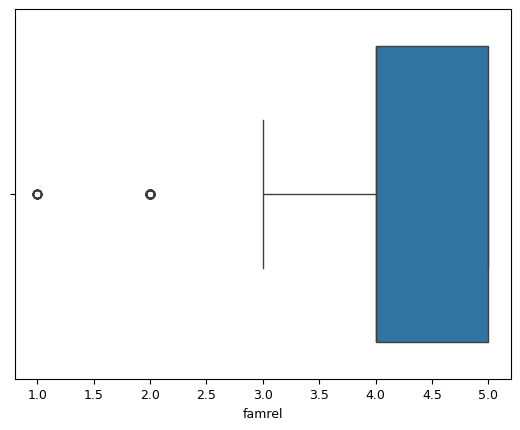

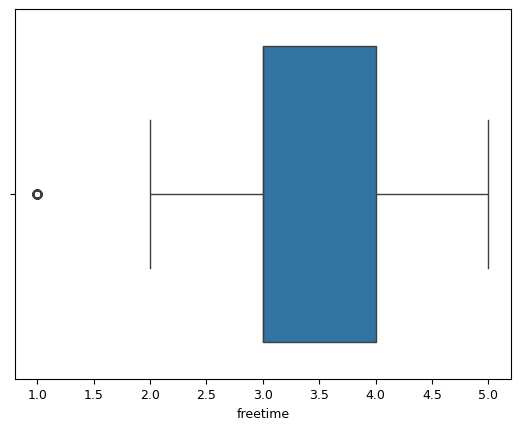

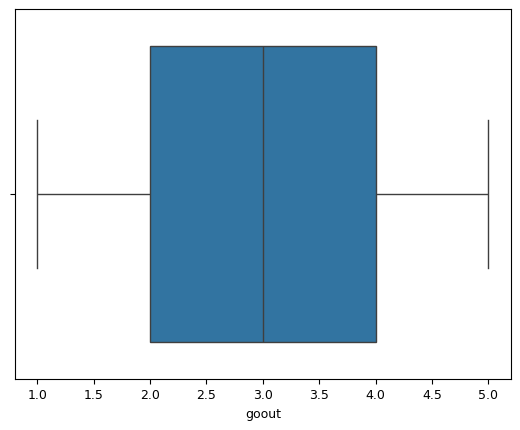

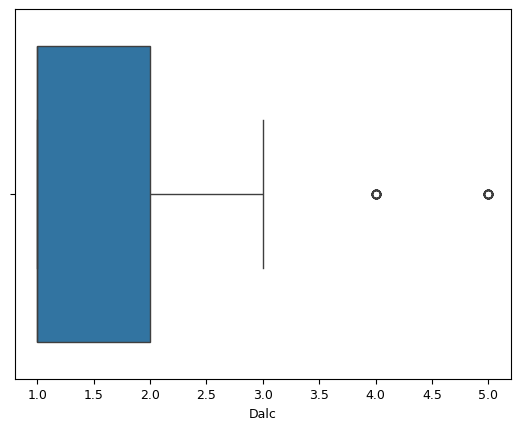

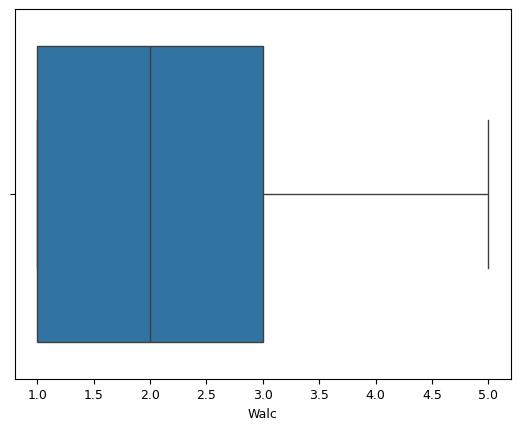

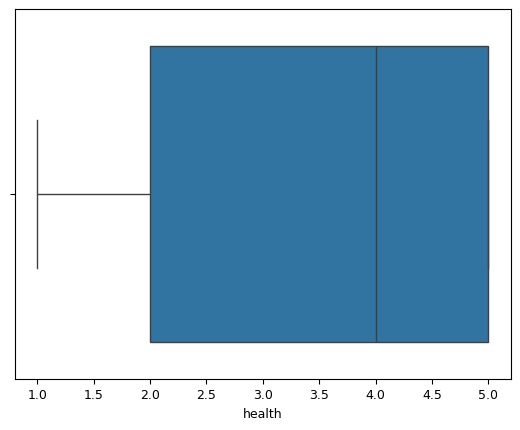

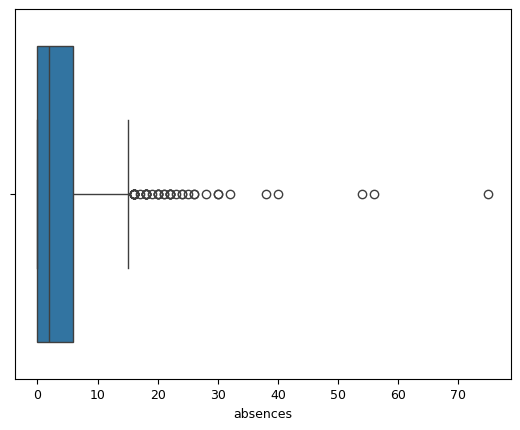

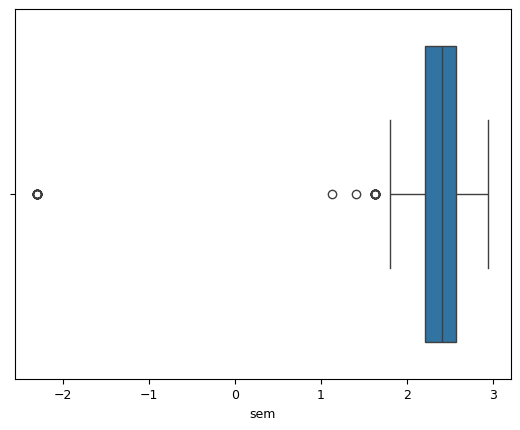

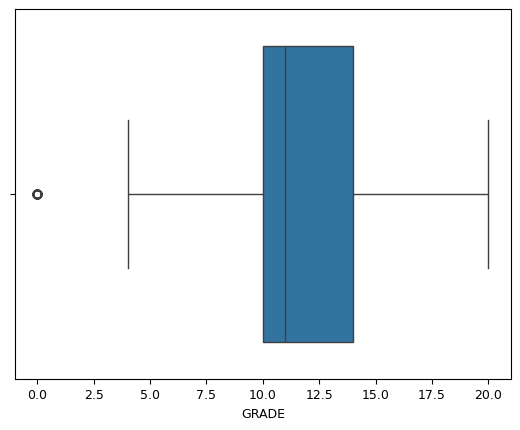

In [14]:
for col in df.columns:
    sns.boxplot(data=df, x=col)
    plt.show()

# Завдання 2
Навчити модель лінійної регресії (`sklearn.linear_model.LinearRegression`) лише за числовими ознаками.

Розглянути також варіанти з регуляризацією (`Ridge`, `Lasso`). Знайти оптимальні параметри регуляризації (`alpha`) за допомогою процедури крос-валідації.

Для всіх моделей знайти коефіцієнт детермінації на відкладеній вибірці.

Зробити висновки.

In [15]:
#числові колонки
df_numeric = df.select_dtypes('number')
df_numeric

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,sem,GRADE
0,18,4,4,2,2,0,4,3,4,1,1,3,4,-2.302585,11
1,17,1,1,1,2,0,5,3,3,1,1,3,2,2.208274,11
2,15,1,1,1,2,0,4,3,2,2,3,3,6,2.493205,12
3,15,4,2,1,3,0,3,2,2,1,1,5,0,2.646175,14
4,16,3,3,1,2,0,4,3,2,1,2,5,0,2.406945,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,20,2,2,1,2,2,5,5,4,4,5,4,11,2.208274,9
940,17,3,1,2,1,0,2,4,5,3,4,2,3,2.646175,16
941,21,1,1,1,1,3,5,5,3,3,3,3,3,2.091864,7
942,18,3,2,3,1,0,4,4,1,3,4,5,0,2.406945,10


In [16]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,sem,GRADE
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,4,3,4,1,1,3,4,-2.302585,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,no,5,3,3,1,1,3,2,2.208274,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,no,4,3,2,2,3,3,6,2.493205,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,3,2,2,1,1,5,0,2.646175,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,4,3,2,1,2,5,0,2.406945,13


## Simple linear regression

In [17]:
lin_reg = linear_model.LinearRegression()

In [18]:
y = df_numeric["GRADE"]
X_numeric = df_numeric.drop(columns=["GRADE"])

In [19]:
X_numeric_train, X_numeric_test, y_train, y_test = train_test_split(X_numeric, y)

In [20]:
lin_reg.fit(X_numeric_train, y_train)

LinearRegression()

In [21]:
y_lin_reg_pred = lin_reg.predict(X_numeric_test)

In [22]:
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_lin_reg_pred , squared = False))

Mean squared error: 2.31


C:\Users\Kami\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [23]:
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, y_lin_reg_pred))

Mean absolute error: 1.74


In [24]:
#Детермінація
print("Детермінація: R2 score: %.2f" % r2_score(y_test, y_lin_reg_pred))

Детермінація: R2 score: 0.49


## Метод Ridge

In [25]:
ridge = linear_model.Ridge()

In [26]:
ridge.fit(X_numeric_train, y_train)

Ridge()

In [27]:
y_ridge_pred = ridge.predict(X_numeric_test)

In [28]:
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_ridge_pred, squared = False))

Mean squared error: 2.31


C:\Users\Kami\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [29]:
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, y_ridge_pred))

Mean absolute error: 1.74


In [30]:
#Детермінація
print("Детермінація: R2 score: %.2f" % r2_score(y_test, y_ridge_pred))

Детермінація: R2 score: 0.49


In [31]:
ridge = linear_model.Ridge()

In [32]:
cv_scores = cross_val_score(ridge, X_numeric_train, y_train, cv=10, scoring="neg_root_mean_squared_error")
print("Cross validation scores:\n\t", "\n\t".join("%.4f" % -x for x in cv_scores))
print("Mean CV RMSE = %.4f" % np.mean(-cv_scores))

Cross validation scores:
	 2.7719
	2.9637
	2.6624
	2.6321
	3.0832
	2.6026
	2.4106
	2.9932
	2.2925
	3.0832
Mean CV RMSE = 2.7496


## Метод Lasso

In [33]:
lasso = linear_model.Lasso()
lasso.fit(X_numeric_train, y_train)

Lasso()

In [34]:
y_lasso_pred = lasso.predict(X_numeric_test)

In [35]:
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_lasso_pred, squared = False))

Mean squared error: 2.74


C:\Users\Kami\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [36]:
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, y_lasso_pred))

Mean absolute error: 2.16


In [37]:
#Детермінація
print("Детермінація: R2 score: %.2f" % r2_score(y_test, y_lasso_pred))

Детермінація: R2 score: 0.28


In [38]:
#Висновок

# Завдання 3
Навчити модель лінійної регресії з використанням усіх ознак (застосувати one-hot кодування, бінаризацію тощо до нечислових ознак).

* Спробувати `LinearRegression`, `Ridge`, `Lasso`, `SGDRegressor(loss='squared_error')`, експерементуючи з кількістю і складом ознак та  підбором основних гіперпараметрів.
    * `alpha` для `Ridge` та `Lasso`
    * `penalty`, `alpha`, `learning_rate` для `SGDRegressor` за допомогою `GridSearchCV`
* Мета -- отримати якомога кращий результат.
* Знайти коефіцієнт детермінації для найкращих моделей на відкладеній вибірці.


### Зробити висновки і обрати найкращу модель яка розв'язує задачу регресії. Для найкращої моделі знайти прогнози на вибірці `predict.csv`. Значення прогнозів зберегти у файл `predictions_reg.csv`.

## Encoding df
### OneHotEnc

In [39]:
encoder = OneHotEncoder(sparse_output=False)
encoded_data = encoder.fit_transform(df[['school', 'sex', 'address', 'famsize', 'Pstatus', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']])
                                         
one_hot_encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['school', 'sex', 'address', 'famsize', 'Pstatus', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']))

In [40]:
one_hot_encoded_df

,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
1,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
3,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
4,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
940,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
941,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
942,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


## Матриця кореляції пірсона за енкодованими даними

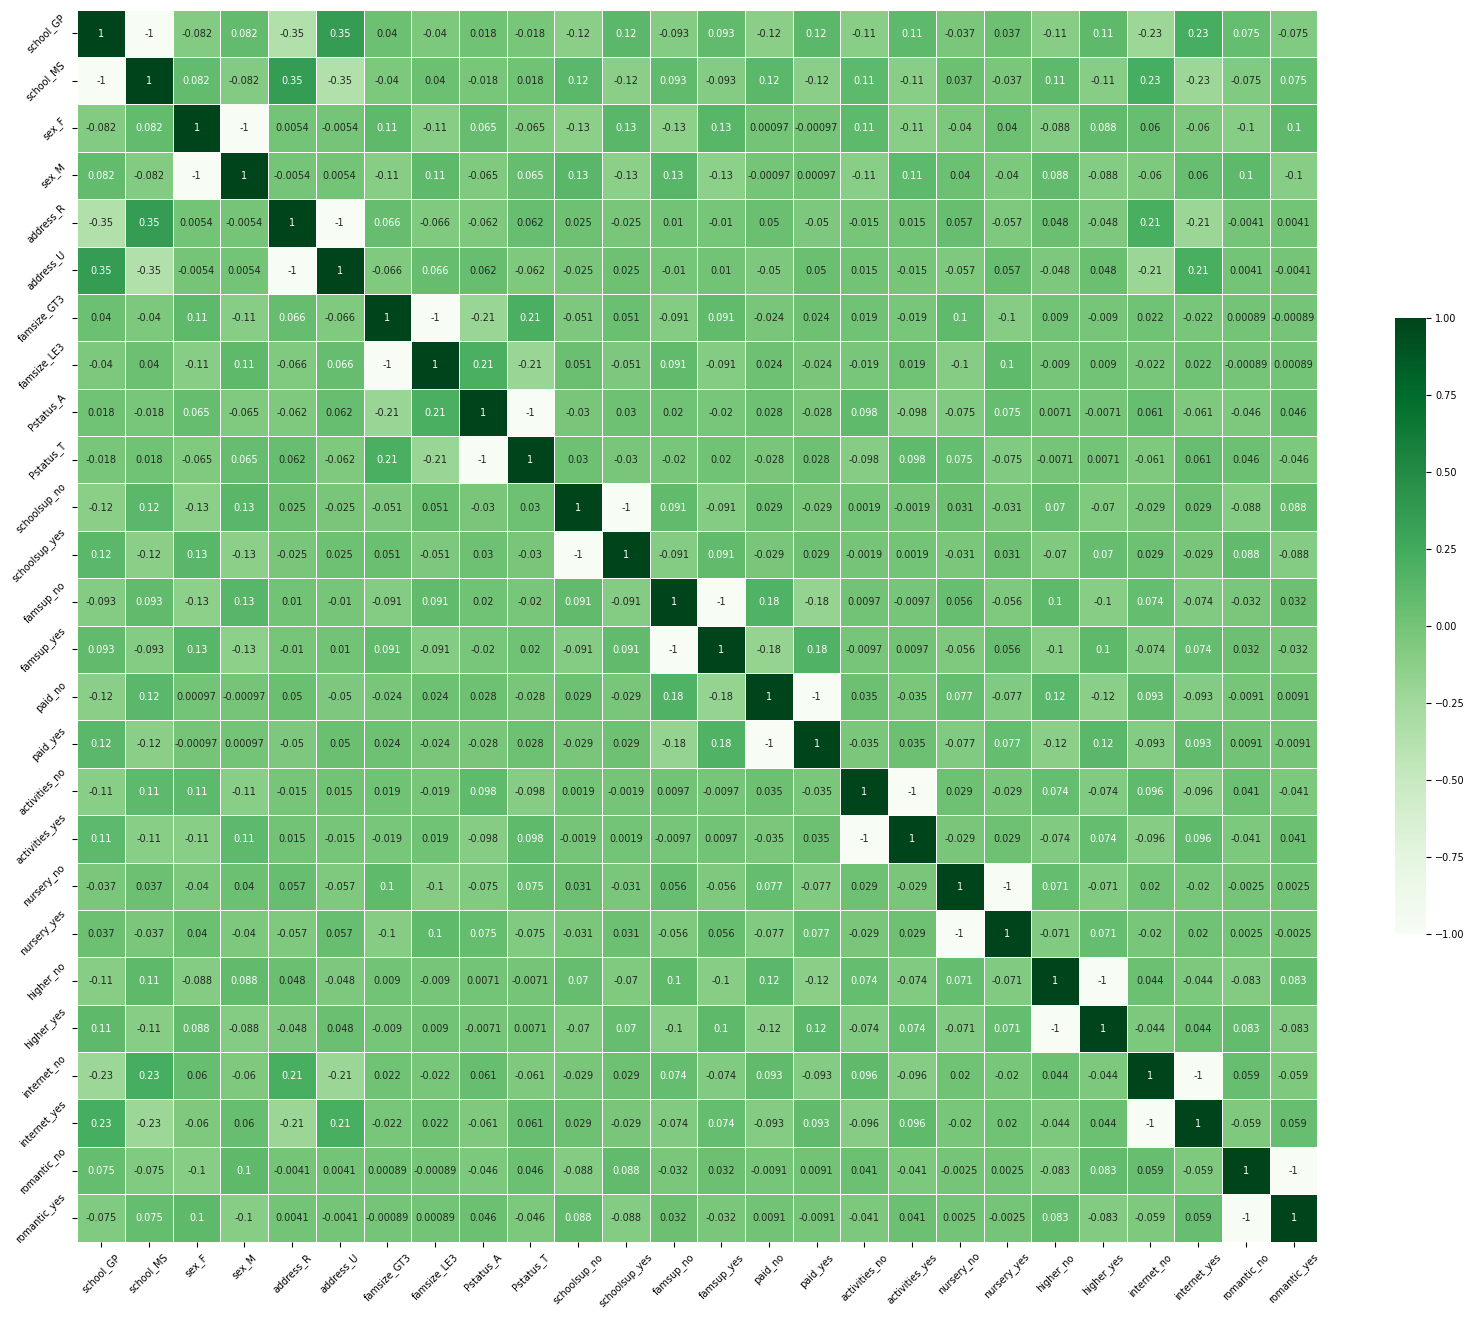

In [41]:
corr = one_hot_encoded_df.corr()
plt.rc('font', size=7)
plt.figure(figsize=(20, 16))
sns.heatmap(corr, annot=True, linewidths=0.5, cbar_kws={'shrink': 0.5}, cmap = 'Greens')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

### LabelEncoder

In [42]:
df_object = df.select_dtypes('object')
df_object = df_object.drop(columns = ['sex','school', 'address', 'famsize', 'Pstatus', 'schoolsup', 'famsup', 'paid', 'nursery', 'higher', 'internet', 'romantic', 'activities', ])
                                          
df_object
from sklearn import preprocessing
Mjob_le = preprocessing.LabelEncoder()
df_object['Mjob_enc'] = Mjob_le.fit_transform(df_object['Mjob'])

Fjob_le = preprocessing.LabelEncoder()
df_object['Fjob_enc'] = Fjob_le.fit_transform(df_object['Fjob'])

reason_le = preprocessing.LabelEncoder()
df_object['reason_enc'] = reason_le.fit_transform(df_object['reason'])

guardian_le = preprocessing.LabelEncoder()
df_object['guardian_enc'] = guardian_le.fit_transform(df_object['guardian'])
df_object_le_enc = df_object.drop(columns = ['Mjob', 'Fjob', 'reason', 'guardian'])
encoded_df = pd.concat([one_hot_encoded_df, df_object_le_enc, df['GRADE']], axis = 1)

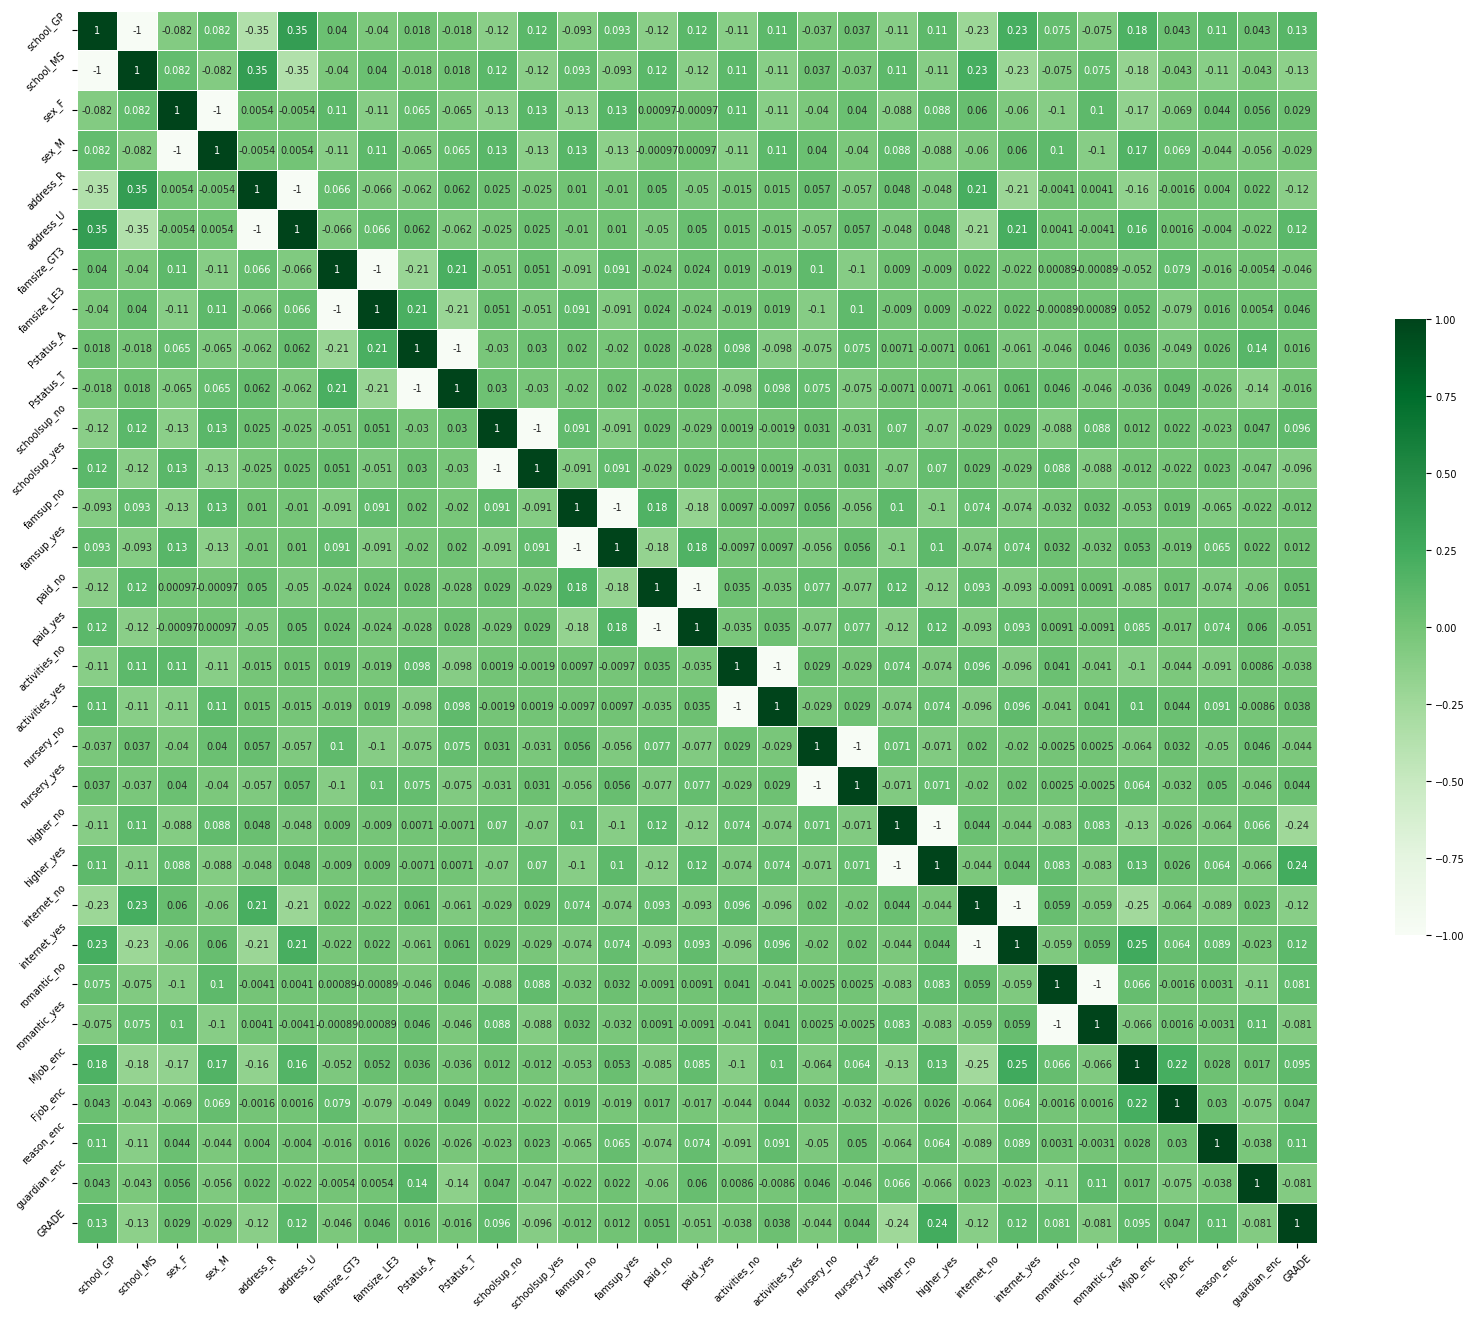

In [43]:
corr = encoded_df.corr()
plt.rc('font', size=7)
plt.figure(figsize=(20, 16))
sns.heatmap(corr, annot=True, linewidths=0.5, cbar_kws={'shrink': 0.5}, cmap = 'Greens')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [44]:
encoded_df

,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,...,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes,Mjob_enc,Fjob_enc,reason_enc,guardian_enc,GRADE
0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0,4,0,1,11
1,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,1.0,0.0,0,2,0,0,11
2,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,1.0,0.0,0,2,2,1,12
3,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,1,3,1,1,14
4,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,1.0,0.0,1.0,0.0,2,2,1,0,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,1.0,0.0,3,3,0,2,9
940,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,1.0,0.0,3,3,0,1,16
941,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,1.0,0.0,1.0,0.0,2,2,0,2,7
942,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,1.0,0.0,3,2,0,1,10


## LinearRegression з гіперпараметрами

In [45]:
linreg = linear_model.LinearRegression()
alpha_lin_reg = {'alpha': [0.1, 0.5, 1.0, 5, 10, 25, 50, 100]}

grid_lin_reg = GridSearchCV(Ridge(), param_grid=alpha_lin_reg, cv=10, n_jobs=-1)

grid_lin_reg.fit(X_numeric_train, y_train)

best_model = grid_lin_reg.best_estimator_
best_score = grid_lin_reg.best_score_

print(f"Best model hyperparameter: {best_model.alpha}")
print(f"Best cross-validation score: {best_score:.4f}")

print(" Results from Grid Search ")
print("\n The best estimator across all alphas:\n", grid_lin_reg.best_estimator_)
print("\n The best score across all alphas:\n", grid_lin_reg.best_score_)
print("\n The best alpha:\n", grid_lin_reg.best_params_)

lin_reg_best_params = LinearRegression()
lin_reg_best_params.fit(X_numeric_train, y_train)
y_gridrsearchcv_lin_reg_pred = lin_reg_best_params.predict(X_numeric_test)
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, y_gridrsearchcv_lin_reg_pred))
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_gridrsearchcv_lin_reg_pred , squared = False))
print("R2 score: %.2f" % r2_score(y_test, y_gridrsearchcv_lin_reg_pred ))

Best model hyperparameter: 10
Best cross-validation score: 0.4943
 Results from Grid Search 

 The best estimator across all alphas:
 Ridge(alpha=10)

 The best score across all alphas:
 0.49430643940084157

 The best alpha:
 {'alpha': 10}
Mean absolute error: 1.74
Mean squared error: 2.31
R2 score: 0.49


C:\Users\Kami\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## Ridge з гіперпараметрами

In [46]:
alpha_ridge = {'alpha': [0.1, 0.5, 1.0, 5, 10, 25, 50, 100]}
grid_ridge = GridSearchCV(Ridge(), param_grid=alpha_ridge, cv=10, n_jobs=-1)
grid_ridge.fit(X_numeric_train, y_train)

best_model_ridge = grid_ridge.best_estimator_
best_score_ridge = grid_ridge.best_score_

print(" Results from Ridge Grid Search ")
print("\n The best estimator across all alphas:\n", grid_ridge.best_estimator_)
print("\n The best score across all alphas:\n", grid_ridge.best_score_)
print("\n The best alpha:\n", grid_ridge.best_params_)

ridge_best_params = Ridge(alpha=grid_ridge.best_params_['alpha'])
ridge_best_params.fit(X_numeric_train, y_train)
y_gridrsearchcv_ridge_pred = ridge_best_params.predict(X_numeric_test)
print("Mean absolute error (Ridge): %.2f" % mean_absolute_error(y_test, y_gridrsearchcv_ridge_pred))
print("Mean squared error (Ridge): %.2f" % mean_squared_error(y_test, y_gridrsearchcv_ridge_pred, squared=False))
print("R2 score (Ridge): %.2f" % r2_score(y_test, y_gridrsearchcv_ridge_pred))

 Results from Ridge Grid Search 

 The best estimator across all alphas:
 Ridge(alpha=10)

 The best score across all alphas:
 0.49430643940084157

 The best alpha:
 {'alpha': 10}
Mean absolute error (Ridge): 1.75
Mean squared error (Ridge): 2.32
R2 score (Ridge): 0.48


C:\Users\Kami\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## Lasso з гіперпараметрами

In [47]:
alpha_lasso = {'alpha': [0.1, 0.5, 1.0, 5, 10, 25, 50, 100]}
grid_lasso = GridSearchCV(Lasso(), param_grid=alpha_lasso, cv=10, n_jobs=-1)
grid_lasso.fit(X_numeric_train, y_train)

best_model_lasso = grid_lasso.best_estimator_
best_score_lasso = grid_lasso.best_score_

print(" Results from Lasso Grid Search ")
print("\n The best estimator across all alphas:\n", grid_lasso.best_estimator_)
print("\n The best score across all alphas:\n", grid_lasso.best_score_)
print("\n The best alpha:\n", grid_lasso.best_params_)

lasso_best_params = Lasso(alpha=grid_lasso.best_params_['alpha'])
lasso_best_params.fit(X_numeric_train, y_train)
y_gridrsearchcv_lasso_pred = lasso_best_params.predict(X_numeric_test)
print("Mean absolute error (Lasso): %.2f" % mean_absolute_error(y_test, y_gridrsearchcv_lasso_pred))
print("Mean squared error (Lasso): %.2f" % mean_squared_error(y_test, y_gridrsearchcv_lasso_pred, squared=False))
print("R2 score (Lasso): %.2f" % r2_score(y_test, y_gridrsearchcv_lasso_pred))

 Results from Lasso Grid Search 

 The best estimator across all alphas:
 Lasso(alpha=0.1)

 The best score across all alphas:
 0.49898380676707976

 The best alpha:
 {'alpha': 0.1}
Mean absolute error (Lasso): 1.76
Mean squared error (Lasso): 2.31
R2 score (Lasso): 0.49


C:\Users\Kami\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## SGDRegressor(loss='squared_error') з гіперпараметрами

In [48]:
params_sgd = {
    'penalty': ['l1', 'l2'],
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10],
    'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive']
}

grid_sgd = GridSearchCV(SGDRegressor(loss='squared_error'), param_grid=params_sgd, cv=10, n_jobs=-1)
grid_sgd.fit(X_numeric_train, y_train)

best_sgd_model = grid_sgd.best_estimator_
best_sgd_score = grid_sgd.best_score_

print("\nSGDRegressor:")
print(f"Best model hyperparameters: {grid_sgd.best_params_}")
print(f"Best cross-validation score: {best_sgd_score:.4f}")


SGDRegressor:
Best model hyperparameters: {'alpha': 0.01, 'learning_rate': 'invscaling', 'penalty': 'l1'}
Best cross-validation score: 0.4654


In [49]:
SGD_best_params = SGDRegressor(alpha = 0.001, learning_rate = 'invscaling', penalty = 'l2')

In [50]:
SGD_best_params.fit(X_numeric_train, y_train)

SGDRegressor(alpha=0.001)

In [51]:
y_gridrsearchcv_SGD_pred = SGD_best_params.predict(X_numeric_test)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_gridrsearchcv_SGD_pred, squared = False))
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, y_gridrsearchcv_SGD_pred))
print("Детермінація: R2 score: %.2f" % r2_score(y_test, y_gridrsearchcv_SGD_pred))

Mean squared error: 2.43
Mean absolute error: 1.85
Детермінація: R2 score: 0.43


C:\Users\Kami\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## Зробити висновки і обрати найкращу модель яка розв'язує задачу регресії. Для найкращої моделі знайти прогнози на вибірці predict.csv. Значення прогнозів зберегти у файл predictions_reg.csv.

In [52]:
predict = pd.read_csv('predict.csv')
predict

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,sem
0,MS,M,16,U,GT3,T,1,1,at_home,services,...,no,yes,5,4,5,4,5,3,0,-2.302585
1,MS,F,17,U,GT3,T,1,1,other,at_home,...,no,no,4,3,2,1,2,5,9,1.960095
2,GP,F,18,U,LE3,T,2,2,at_home,services,...,yes,yes,5,3,1,1,1,5,16,2.091864
3,MS,F,18,U,GT3,T,2,2,other,other,...,yes,yes,1,3,1,1,1,2,4,2.091864
4,MS,M,17,U,GT3,T,1,2,other,other,...,yes,yes,5,3,5,5,5,1,12,1.808289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,GP,M,17,R,LE3,T,1,1,other,services,...,no,yes,5,3,5,1,5,5,0,1.629241
96,GP,F,17,U,LE3,T,2,2,other,other,...,yes,yes,3,4,4,1,3,5,12,2.312535
97,GP,F,18,U,GT3,T,4,3,other,other,...,yes,yes,4,3,4,1,1,5,9,2.208274
98,GP,F,16,U,LE3,T,2,2,at_home,other,...,no,no,4,3,4,1,2,2,4,1.960095


In [53]:
predict_num = predict.select_dtypes('number')
predict_num

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,sem
0,16,1,1,2,2,0,5,4,5,4,5,3,0,-2.302585
1,17,1,1,1,1,0,4,3,2,1,2,5,9,1.960095
2,18,2,2,1,2,1,5,3,1,1,1,5,16,2.091864
3,18,2,2,2,2,0,1,3,1,1,1,2,4,2.091864
4,17,1,2,1,1,1,5,3,5,5,5,1,12,1.808289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,17,1,1,4,2,3,5,3,5,1,5,5,0,1.629241
96,17,2,2,1,1,0,3,4,4,1,3,5,12,2.312535
97,18,4,3,1,3,0,4,3,4,1,1,5,9,2.208274
98,16,2,2,1,2,0,4,3,4,1,2,2,4,1.960095


In [54]:
best_reg_model_predictions = grid_lasso.predict(predict_num)
best_reg_model_predictions

array([-2.70742383, 10.02386807,  9.77608639, 10.60593709,  8.47816267,
       12.95476965, 12.56681969, 11.08392005, 12.79315909,  6.70238598,
        9.97430415, 11.65134487, 10.86161466, 12.18827646, 10.10584119,
       12.19700235, 12.54083975, 11.4957971 , 11.70756862,  9.56911219,
       13.9470033 ,  8.52984057,  9.19386296, 11.53671919, 11.78388174,
       13.38462761, 11.10372129, 11.55593228, 12.72404304, 10.81080034,
       11.47738764, 12.25272625,  9.09430534, 10.5332382 , 11.68200145,
       12.3365918 ,  9.59597904, 11.08204742, 12.44118313,  9.81765228,
       12.46137846,  9.25732831, 12.71542959, 10.786147  , 12.85405527,
       13.39501754, 11.55800133, 11.13683302, 11.66303985, 11.72348342,
       12.53965998, 11.25268604, 11.53131136,  9.82438481, 11.0309624 ,
       11.82614709, 12.30151637, 10.65336823, 10.64325768, 12.11727864,
       -4.35661757, 12.56782466, 13.24324638,  8.56645819, 10.39438544,
        6.71408091, 10.99220903, 13.85387696, 12.3005817 , 12.45

In [55]:
pd.Series(best_reg_model_predictions).to_csv('predictions_reg.csv')

# Завдання 4

[1 бал]

Зберегти результати роботи у jupyter-ноутбук. Ноутбук повинен бути збережений у стані в якому усі клітинки запущені і не містити помилок. Формат назви файлу `M1_Прізвище_Ім'я.ipynb`

Окремо додати файл `predictions_reg.csv`.

Додатково можна отримати до [4 балів] за порівняннями результатів найкращих моделей завданнь 2 та 3.

## Цей код порівнює всі моделі з 2 та 3 завдань і виводить де було досягнуто найкращого результату

In [56]:
models_params_task2 = [
    {
        "Model": "Linear Regression",
        "Mean Absolute Error": mean_absolute_error(y_test, y_lin_reg_pred),
        "Mean Squared Error": mean_squared_error(y_test, y_lin_reg_pred, squared=False),
        "R2 Score": r2_score(y_test, y_lin_reg_pred)
    },
    {
        "Model": "Ridge",
        "Mean Absolute Error": mean_absolute_error(y_test, y_ridge_pred),
        "Mean Squared Error": mean_squared_error(y_test, y_ridge_pred, squared=False),
        "R2 Score": r2_score(y_test, y_ridge_pred)
    },
    {
        "Model": "Lasso",
        "Mean Absolute Error": mean_absolute_error(y_test, y_lasso_pred),
        "Mean Squared Error": mean_squared_error(y_test, y_lasso_pred, squared=False),
        "R2 Score": r2_score(y_test, y_lasso_pred)
    }
]

models_params_task3 = [
    {
        "Model": "Linear Regression (with all features)",
        "Mean Absolute Error": mean_absolute_error(y_test, y_gridrsearchcv_lin_reg_pred),
        "Mean Squared Error": mean_squared_error(y_test, y_gridrsearchcv_lin_reg_pred, squared=False),
        "R2 Score": r2_score(y_test, y_gridrsearchcv_lin_reg_pred)
    },
    {
        "Model": "Ridge",
        "Mean Absolute Error": mean_absolute_error(y_test, y_gridrsearchcv_ridge_pred),
        "Mean Squared Error": mean_squared_error(y_test, y_gridrsearchcv_ridge_pred, squared=False),
        "R2 Score": r2_score(y_test, y_gridrsearchcv_ridge_pred)
    },
    {
        "Model": "Lasso",
        "Mean Absolute Error": mean_absolute_error(y_test, y_gridrsearchcv_lasso_pred),
        "Mean Squared Error": mean_squared_error(y_test, y_gridrsearchcv_lasso_pred, squared=False),
        "R2 Score": r2_score(y_test, y_gridrsearchcv_lasso_pred)
    },
    {
        "Model": "SGDRegressor",
        "Mean Absolute Error": mean_absolute_error(y_test, y_gridrsearchcv_SGD_pred),
        "Mean Squared Error": mean_squared_error(y_test, y_gridrsearchcv_SGD_pred, squared=False),
        "R2 Score": r2_score(y_test, y_gridrsearchcv_SGD_pred)
    }
]

best_model_task2 = max(models_params_task2, key=lambda x: x["R2 Score"])
best_model_task3 = max(models_params_task3, key=lambda x: x["R2 Score"])

if best_model_task2["R2 Score"] > best_model_task3["R2 Score"]:
    print("---> Найкращий результат досягнуто в рамках завдання 2:")
    print(best_model_task2)
elif best_model_task3["R2 Score"] > best_model_task2["R2 Score"]:
    print("---> Найкращий результат досягнуто в рамках завдання 3:")
    print(best_model_task3)
else:
    print("---> Обидва завдання мають однаковий найкращий результат:")
    print(best_model_task2)
    print(best_model_task3)

---> Найкращий результат досягнуто в рамках завдання 3:
{'Model': 'Lasso', 'Mean Absolute Error': 1.757558646788146, 'Mean Squared Error': 2.3118635117559165, 'R2 Score': 0.48705373904822435}


C:\Users\Kami\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Kami\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Kami\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Kami\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: '